In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
from adjustText import adjust_text
import os

In [2]:
Y_cols = [
    'LPS Abs',
    'MPLA Abs',
    'CpG Abs',
    'LMCpG Abs',
    'LPS Lum',
    'MPLA Lum',
    'cGAMP Lum',
    'LMcGAMP Lum'
]

panel_names = [
    'NF-$\kappa$B LPS',
    'NF-$\kappa$B MPLA',
    'NF-$\kappa$B CpG',
    'NF-$\kappa$B Generalist',
    'IRF LPS',
    'IRF MPLA',
    'IRF cGAMP',
    'IRF Generalist'
]

In [3]:
plt.rcParams.update({'font.size': 15})

In [11]:
def plot_weight(ax, target, eff_desc, i, j, n_mols, va=False, weights_fontsize=10):
    n_mols = min(n_mols, len(eff_desc))
    eff_desc = eff_desc.iloc[:n_mols, :]
    pos_x_range = np.array(eff_desc[eff_desc['weight'] > 0].index)
    neg_x_range = np.array(eff_desc[eff_desc['weight'] < 0].index)
    # plt.rcParams.update({'font.size': 15})
    # plt.figure(figsize=(6,4), dpi=300)
    # ax = plt.gca()
    # sns.scatterplot(ax=ax, x=pos_x_range, y=eff_desc['abs weight'][pos_x_range], color='green', edgecolor='k', linewidth=1)
    # sns.scatterplot(ax=ax, x=neg_x_range, y=eff_desc['abs weight'][neg_x_range], color='green', edgecolor='k', linewidth=1)
    ax.scatter(x=pos_x_range, y=eff_desc['abs weight'][pos_x_range], color='green', edgecolor='k', linewidth=1)
    ax.scatter(x=neg_x_range, y=eff_desc['abs weight'][neg_x_range], color='green', edgecolor='k', linewidth=1)
    ylims = ax.get_ylim()
    ylims_diff = ylims[1] - ylims[0]
    disp = 0.1
    texts = []
    for x in pos_x_range:
        texts.append(ax.text(x, eff_desc['abs weight'][x], eff_desc['descriptor'][x], ha='center', va='center', fontsize=weights_fontsize))
    for x in neg_x_range:
        texts.append(ax.text(x, eff_desc['abs weight'][x], eff_desc['descriptor'][x], ha='center', va='center', color='red', fontsize=weights_fontsize))

    # if texts == []:
    #     ax.set_yticks([])
    #     ax.set_ylim([-1,1])
    #     ax.set_xticks([])
    #     ax.set_xlim([-1,1])
    #     texts.append(ax.text(-0.0, -0.01, 'No non-zero coefficient weights', ha='center', va='center', fontsize=12))
    #     # ax.set_ylabel('Magnitude of coefficent weight, ||$\\theta_k$||')
    # else:
    ax.set_xlim(-0.5, n_mols-0.5)
    ax.set_ylim(ylims[0] - disp * ylims_diff, ylims[1] + disp * ylims_diff)
    # print(plt.ylim())
    # plt.yscale('log')
    ax.set_xticks(ticks=np.arange(n_mols), labels=np.arange(n_mols)+1)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel('Ranking', fontsize=20)
    # if j == 0:
    ax.set_ylabel('||$\\theta_k$||', fontsize=20)
        
    # adjust_text(texts, force_points=5, only_move={'points': 'y', 'texts': 'y'}, autoalign='y', ax=ax, arrowprops=dict(arrowstyle='-', color='k'))
    adjust_text(texts, avoid_self=True, only_move={'points': 'y', 'texts': 'xy'}, autoalign='y', ax=ax, arrowprops=dict(arrowstyle='-', color='k'))

    if va == True:
        ax.set_title(panel_names[i*2+j], fontsize=25)
        ax.text(-0.22,1.2, [['A', 'B'], ['C', 'D'], ['E', 'F'], ['G', 'H']][i][j],  transform=ax.transAxes, fontsize=30, fontweight='bold', va='top')
    else:
        ax.set_title(panel_names[i*4+j], fontsize=25)
        ax.text(-0.22,1.2, [['A', 'B', 'C', 'D'], ['E', 'F', 'G', 'H']][i][j],  transform=ax.transAxes, fontsize=30, fontweight='bold', va='top')

    # ax.yaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    # ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
    # plt.grid(which='minor')
    # plt.grid(which='major')
    # plt.savefig(f'weight-{target}')
    # plt.show()

In [5]:
# plt.rcParams.update({'font.size': 15})
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,8), dpi=600)
for i, target in enumerate(Y_cols):
    for filename in os.listdir():
        if filename.startswith(f'descriptors-{target}'):
            break
    eff_desc = pd.read_csv(filename)
    j = i % 4
    i = i // 4
    plot_weight(axs[i,j], target, eff_desc, i, j, n_mols=6)
plt.tight_layout()
plt.savefig('weights-integrated.png')
plt.savefig('weights-integrated.pdf')
plt.savefig('weights-integrated.svg')
# plt.savefig('Fig5.pdf')
plt.show()

In [13]:
plt.rcParams.update({'font.size': 15})
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,16), dpi=600)
for i, target in enumerate(Y_cols):
    for filename in os.listdir():
        if filename.startswith(f'descriptors-{target}'):
            break
    eff_desc = pd.read_csv(filename)
    j = i % 2
    i = i // 2
    plot_weight(axs[i,j], target, eff_desc, i, j, n_mols=6, va=True, weights_fontsize=15)
plt.tight_layout()
plt.savefig('weights-integrated-va.png')
plt.savefig('weights-integrated-va.pdf')
plt.savefig('weights-integrated-va.svg')
plt.savefig('Fig5.pdf')
plt.show()

In [6]:
def plot_weight_full(ax, target, eff_desc, i):
    n_mols = len(eff_desc)
    pos_x_range = np.array(eff_desc[eff_desc['weight'] > 0].index)
    neg_x_range = np.array(eff_desc[eff_desc['weight'] < 0].index)
    # plt.rcParams.update({'font.size': 15})
    # plt.figure(figsize=(6,4), dpi=300)
    # ax = plt.gca()
    # sns.scatterplot(ax=ax, x=pos_x_range, y=eff_desc['abs weight'][pos_x_range], color='green', edgecolor='k', linewidth=1)
    # sns.scatterplot(ax=ax, x=neg_x_range, y=eff_desc['abs weight'][neg_x_range], color='green', edgecolor='k', linewidth=1)
    ax.scatter(x=pos_x_range, y=eff_desc['abs weight'][pos_x_range], color='green', edgecolor='k', linewidth=1)
    ax.scatter(x=neg_x_range, y=eff_desc['abs weight'][neg_x_range], color='green', edgecolor='k', linewidth=1)
    ylims = ax.get_ylim()
    ylims_diff = ylims[1] - ylims[0]
    disp = 0.1
    texts = []
    for x in pos_x_range:
        # texts.append(plt.text(x, eff_desc['abs weight'][x] - disp * ylims_diff, eff_desc['descriptor'][x], ha='center', va='center', fontsize=10))
        texts.append(ax.text(x, eff_desc['abs weight'][x], eff_desc['descriptor'][x], ha='center', va='center', fontsize=10))
    for x in neg_x_range:
        # texts.append(plt.text(x, eff_desc['abs weight'][x] - disp * ylims_diff, eff_desc['descriptor'][x], ha='center', va='center', color='red', fontsize=10))
        texts.append(ax.text(x, eff_desc['abs weight'][x], eff_desc['descriptor'][x], ha='center', va='center', color='red', fontsize=10))

    # if texts == []:
    #     ax.set_yticks([])
    #     ax.set_ylim([-1,1])
    #     ax.set_xticks([])
    #     ax.set_xlim([-1,1])
    #     texts.append(ax.text(-0.0, -0.01, 'No non-zero coefficient weights', ha='center', va='center', fontsize=12))
    #     # ax.set_ylabel('Magnitude of coefficent weight, ||$\\theta_k$||')
    # else:
    ax.set_xlim(-0.5, n_mols-0.5)
    ax.set_ylim(ylims[0] - disp * ylims_diff, ylims[1] + disp * ylims_diff)
    # print(plt.ylim())
    # plt.yscale('log')
    ax.set_xticks(ticks=np.arange(n_mols), labels=np.arange(n_mols)+1)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlabel('Ranking', fontsize=20)
    ax.set_ylabel('||$\\theta_k$||', fontsize=20)
        
    adjust_text(texts, force_points=5, only_move={'points': 'y', 'texts': 'y'}, autoalign='y', ax=ax, arrowprops=dict(arrowstyle='-', color='k'))
    
    ax.set_title(panel_names[i], fontsize=25)
    ax.text(-0.1,1.1, ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'][i],  transform=ax.transAxes, fontsize=30, fontweight='bold', va='top')

    # ax.yaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    # ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
    # plt.grid(which='minor')
    # plt.grid(which='major')
    # plt.savefig(f'weight-{target}')
    # plt.show()

In [7]:
fig, axs = plt.subplots(nrows=8, ncols=1, figsize=(15,40), dpi=300)
for i, target in enumerate(Y_cols):
    for filename in os.listdir():
        if filename.startswith(f'descriptors-{target}'):
            break
    eff_desc = pd.read_csv(filename)
    plot_weight_full(axs[i], target, eff_desc, i)
plt.tight_layout()
plt.savefig('weights-full.png')
plt.savefig('weights-full.pdf')
plt.savefig('weights-full.svg')

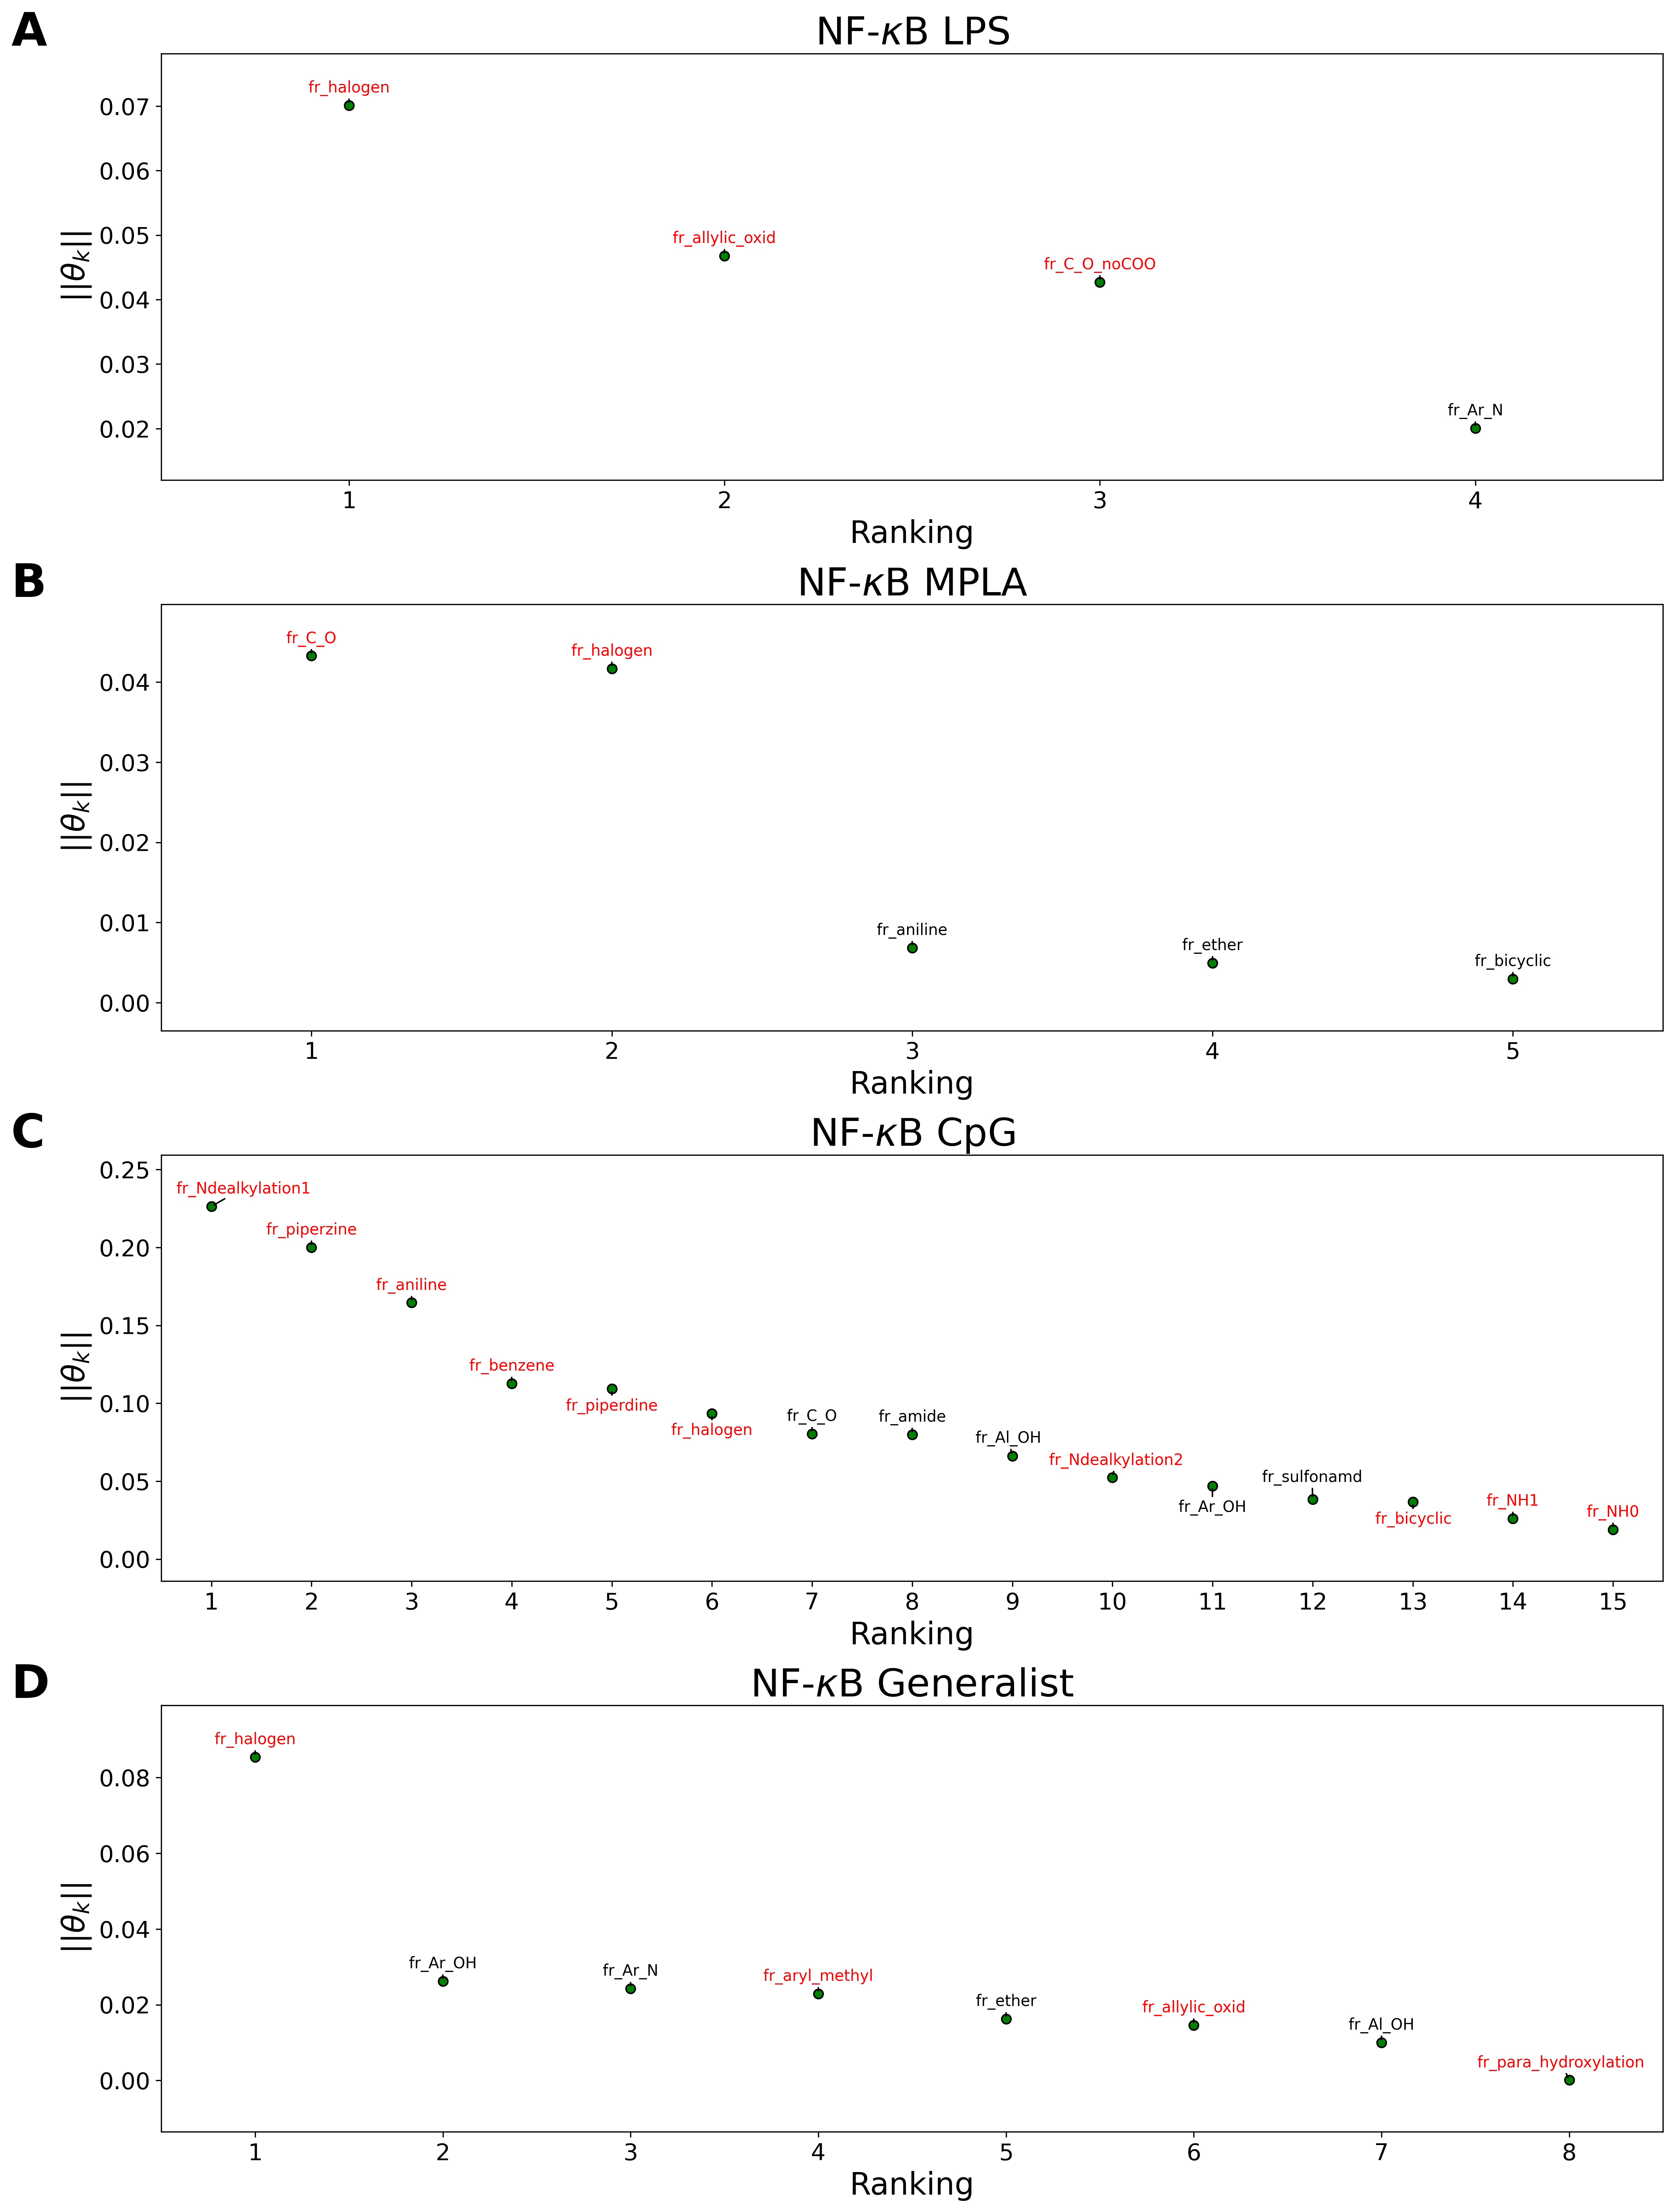

In [8]:
# plt.rcParams.update({'font.size': 15})
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15,20), dpi=300)
for i, target in enumerate(Y_cols[:4]):
    for filename in os.listdir():
        if filename.startswith(f'descriptors-{target}'):
            break
    eff_desc = pd.read_csv(filename)
    plot_weight_full(axs[i], target, eff_desc, i)
plt.tight_layout()
plt.savefig('weights-full-1.png')
plt.savefig('weights-full-1.pdf')
plt.savefig('weights-full-1.svg')

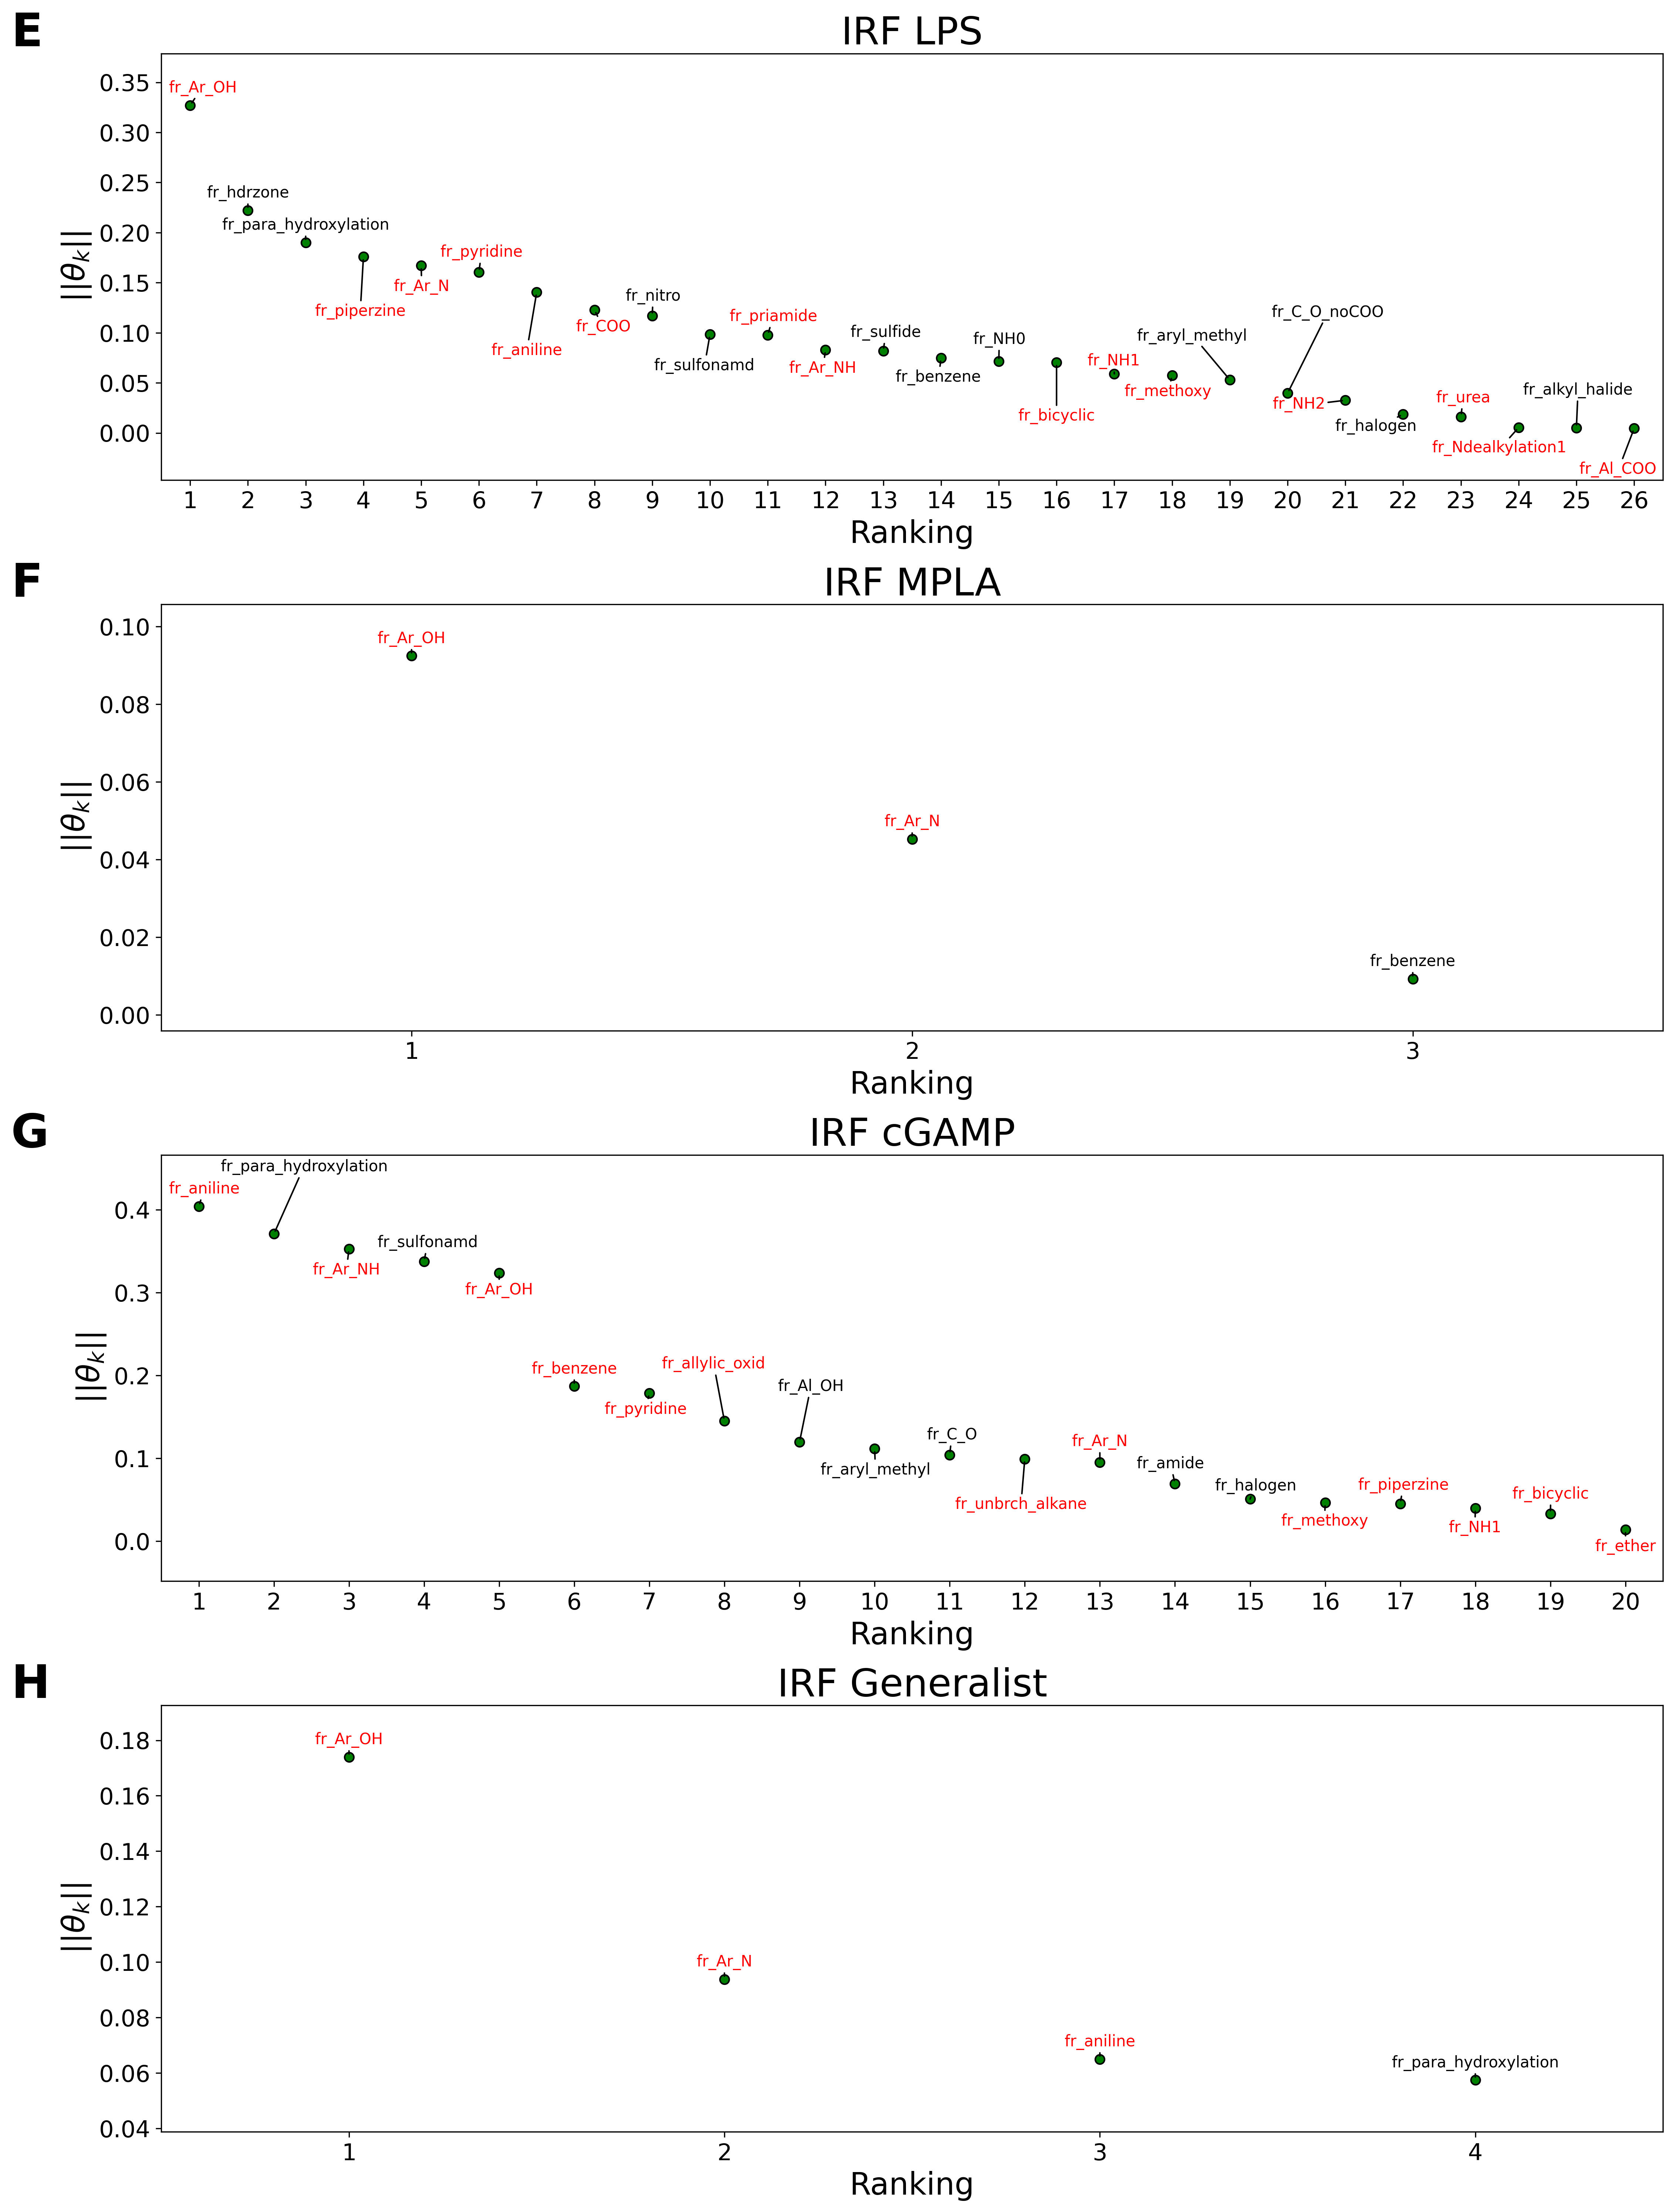

In [9]:
# plt.rcParams.update({'font.size': 15})
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15,20), dpi=300)
for i, target in enumerate(Y_cols[4:8]):
    for filename in os.listdir():
        if filename.startswith(f'descriptors-{target}'):
            break
    eff_desc = pd.read_csv(filename)
    plot_weight_full(axs[i], target, eff_desc, i+4)
plt.tight_layout()
plt.savefig('weights-full-2.png')
plt.savefig('weights-full-2.pdf')
plt.savefig('weights-full-2.svg')